In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [45]:
california = fetch_california_housing()

In [46]:
california.target_names

['MedHouseVal']

In [47]:
df = pd.DataFrame(california.data, columns=california.feature_names)

In [48]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [49]:
df['MedHouseVal'] = california.target

In [50]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [52]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [53]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

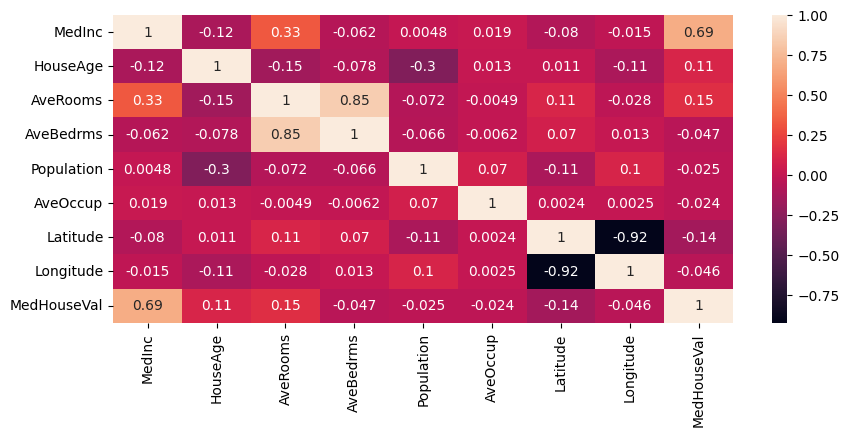

In [54]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True)

In [55]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

Scalar = StandardScaler()

x_tain_scale = Scalar.fit_transform(x_train)
x_test_scale = Scalar.transform(x_test)

In [58]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(n_jobs=-1)

regressor.fit(x_tain_scale, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [59]:
regressor.coef_

array([ 8.46603472e-01,  1.20333548e-01, -2.98800785e-01,  3.47243173e-01,
       -8.81413334e-05, -4.17242067e-02, -8.94420371e-01, -8.70401317e-01])

In [60]:
regressor.intercept_

np.float64(2.066636204801853)

In [61]:
y_pred = regressor.predict(x_test_scale)

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)

rmse = np.sqrt(mse)

Score = r2_score(y_true=y_test, y_pred=y_pred)

print(f'The Mse: {mse} and Mae: {mae} and Rmse : {rmse} and The R2 Score: {Score}')


The Mse: 0.5369686543372462 and Mae: 0.5295710106684453 and Rmse : 0.7327814505957736 and The R2 Score: 0.5970494128783952


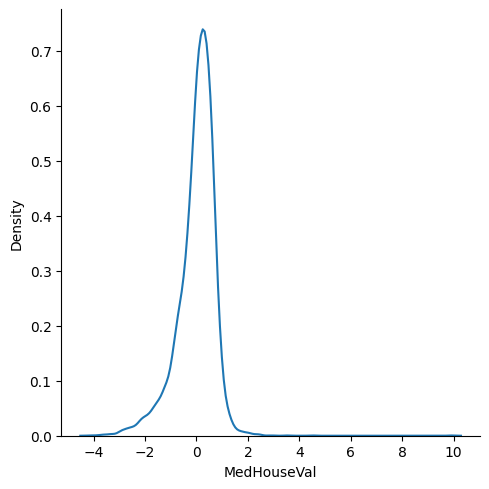

In [63]:
residual = y_pred - y_test

sns.displot(residual, kind='kde')

<Axes: xlabel='MedHouseVal'>

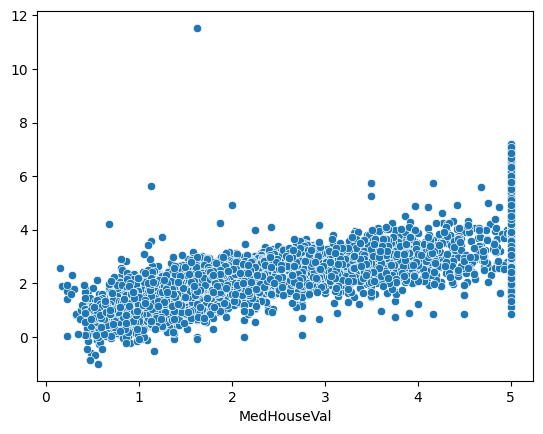

In [64]:
sns.scatterplot(x = y_test, y = y_pred)

<Axes: ylabel='MedHouseVal'>

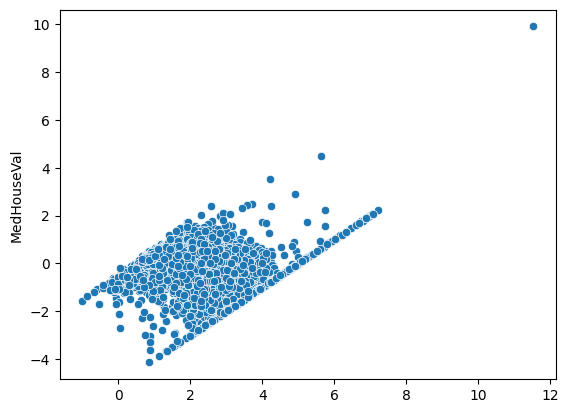

In [65]:
sns.scatterplot(x=y_pred, y=residual)

In [72]:
from sklearn.linear_model import ElasticNetCV

ElasticNetCVR = ElasticNetCV(n_alphas=1000, n_jobs=-1, l1_ratio=0.7)

ElasticNetCVR.fit(x_tain_scale, y_train)

i:\Company\Challenge\Cenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


,l1_ratio,0.7
,eps,0.001
,n_alphas,1000
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,None
,copy_X,True
,verbose,0


In [73]:
r2_score(y_true=y_test, y_pred=ElasticNetCVR.predict(x_test_scale))

0.5980762205800714

In [74]:
# Model Save

import pickle

pickle.dump(ElasticNetCVR, open('ElasticnetModel.pkl','wb'))